# **Logistic Regression Handson**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/bank-additional-full_final (1).csv",sep=";")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.duration

,duration
0,261.0
1,149.0
2,226.0
3,151.0
4,307.0
...,...
41194,239.0
41195,239.0
41196,239.0
41197,NaN


# Problem Statement:

**The above datails the past data of customers that has been given by bank.
Now the bank official wants to launch a plan or scheme for the customers, now being our client the officials wants us to create a model that will predict if the upcomming customers will be interested in the schemes or not**

In [6]:
# EDA - Exploratory Data Analyis
# Cleaning the data:
#   Checking the discrepencies of the data
#   Null values
#   Duplicated
#   Outliers
# Visual Analysis

# Encoding
#Feature Selection

# Model Building
# model training
# Testing of model
# Evaluating the performace of Model


In [7]:
# EDA - Exploratory Data Analyis
# Cleaning the data:
#   Checking the discrepencies of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [8]:
# let's assume  age column is having discrepencies and I want to convert it into  int

# df["age"]=pd.to_numeric(df["age"],errors="coerce")# sample code age does not have issues

In [9]:
#   Null values

In [10]:
df.isnull().sum()

,0
age,4
job,5
marital,5
education,5
default,4
housing,3
loan,4
contact,4
month,3
day_of_week,3


In [11]:
df.isnull().sum().sum()

np.int64(76)

In [12]:
# if null values count< 30%:
#       # Drop the null values
# else:
#   #replace it :
#           if dtype of col is object : replace with mode of the data
#           else : Replace it with median/mean

In [13]:
df[df.isnull().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41189,NaN,retired,NaN,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41190,74.0,NaN,married,NaN,no,yes,no,NaN,nov,fri,...,3.0,999.0,1.0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41192,74.0,retired,NaN,professional.course,NaN,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41198,74.0,retired,married,professional.course,no,yes,NaN,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,NaN,-50.8,1.028,4963.6,no


In [14]:
df.dropna(inplace=True)

In [15]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [16]:
#Duplicate values
df.duplicated().sum()

np.int64(13)

In [17]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39.0,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36.0,retired,married,unknown,no,no,no,telephone,jul,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27.0,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47.0,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32.0,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55.0,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41.0,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39.0,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24.0,services,single,high.school,no,yes,no,cellular,apr,tue,...,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35.0,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()


np.int64(0)

In [20]:
df.shape

(41177, 21)

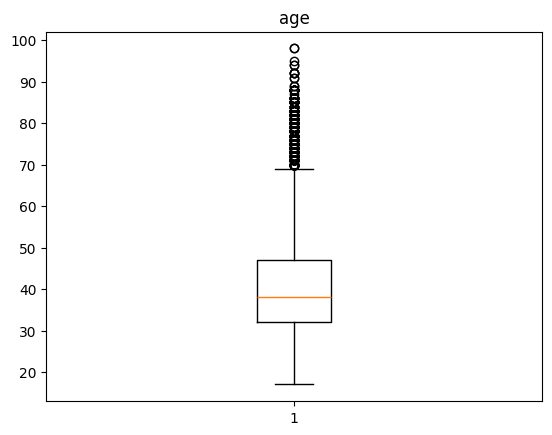

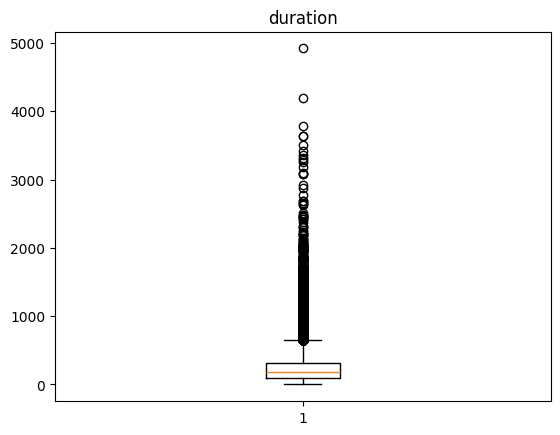

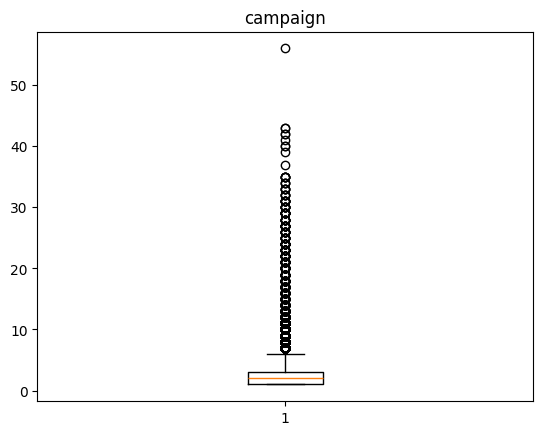

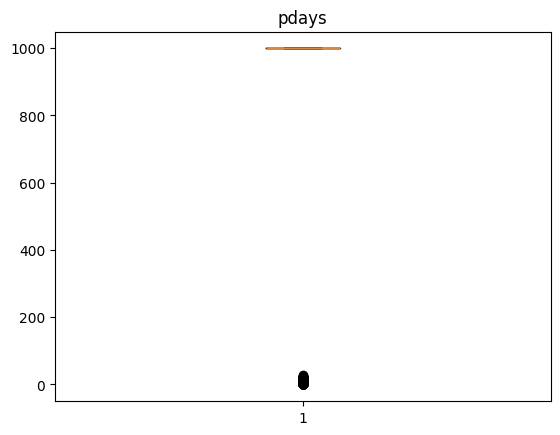

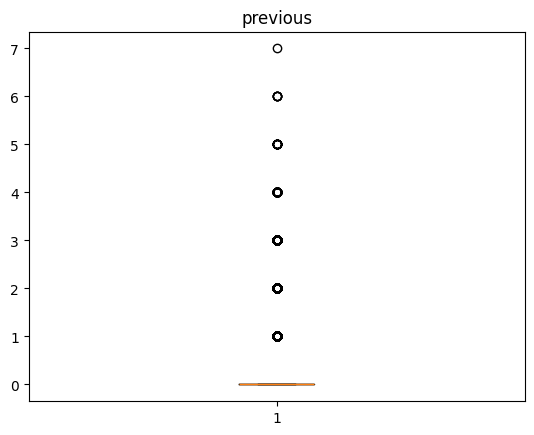

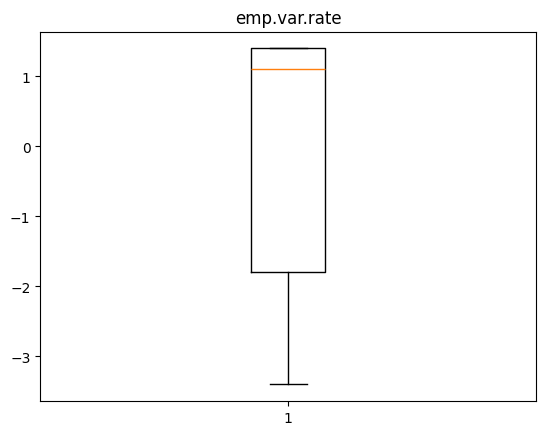

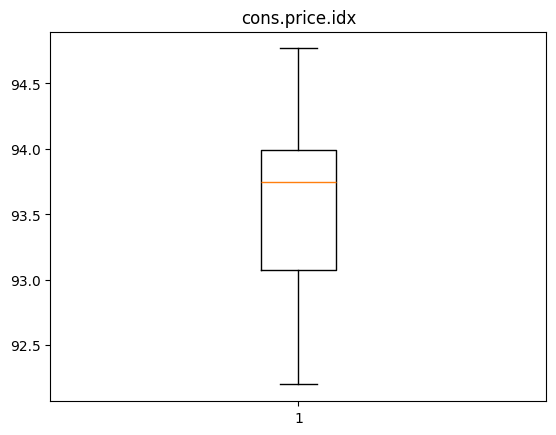

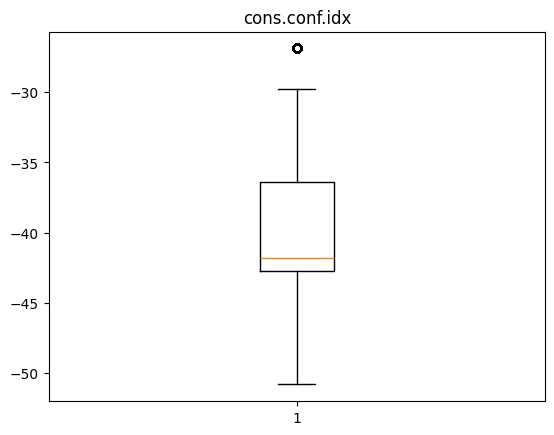

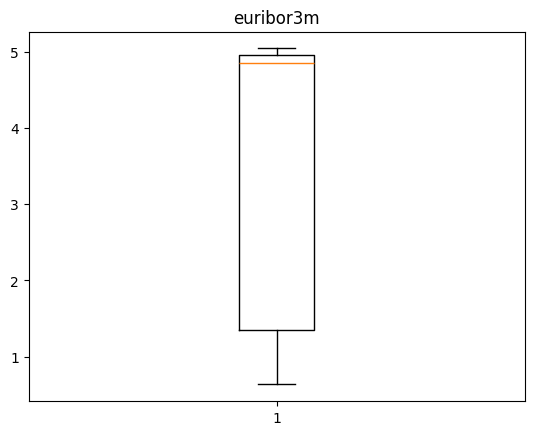

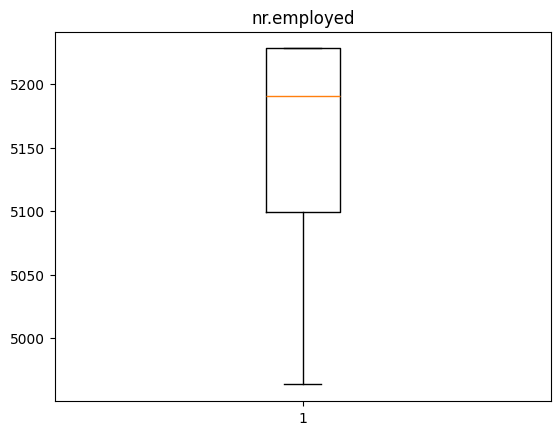

In [21]:
# Outlier Analyis
for col in df.columns:
  if df[col].dtype!="object":
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [22]:
df["pdays"].value_counts()

,count
pdays,
999.0,39662
3.0,439
6.0,412
4.0,118
9.0,64
2.0,61
7.0,60
12.0,58
10.0,52


In [23]:
df["previous"].value_counts()


,count
previous,
0.0,35551
1.0,4562
2.0,754
3.0,216
4.0,70
5.0,18
6.0,5
7.0,1


In [24]:
#let's not check outliers for "pdays" and "previous column"

In [25]:
# creating a list of columns that have outliers
out_col=['age','duration', 'campaign','cons.conf.idx']

In [26]:
# Removing the outliers from out_cols using IQR method
for col in out_col:
  if df[col].dtype!="object":
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[col]>=LL) & (df[col]<=UL)]


In [27]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


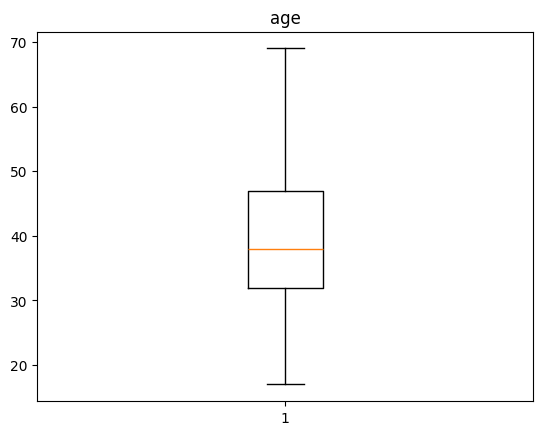

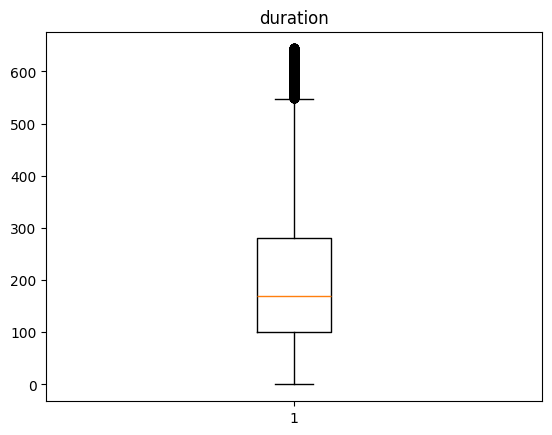

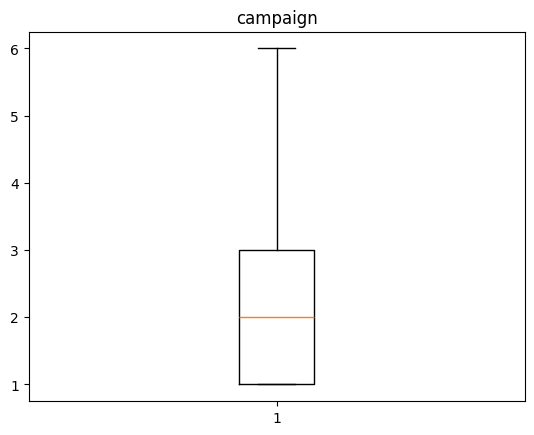

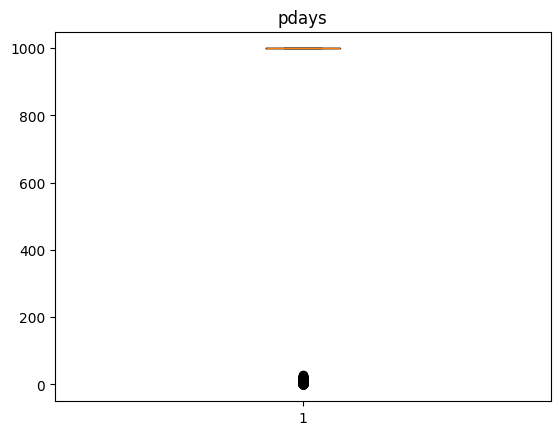

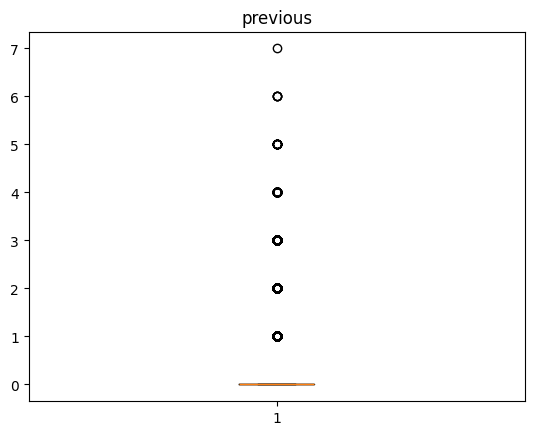

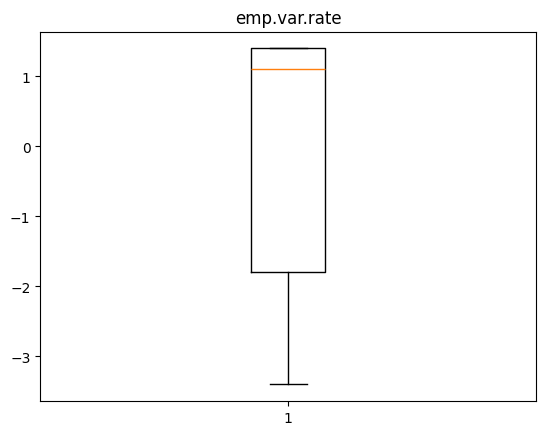

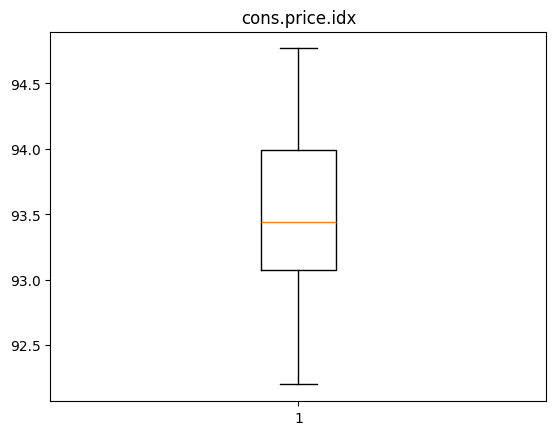

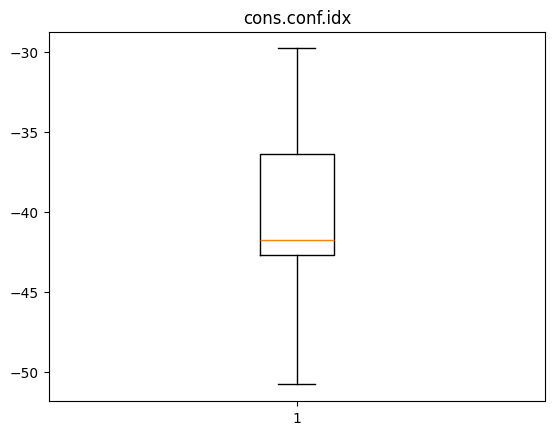

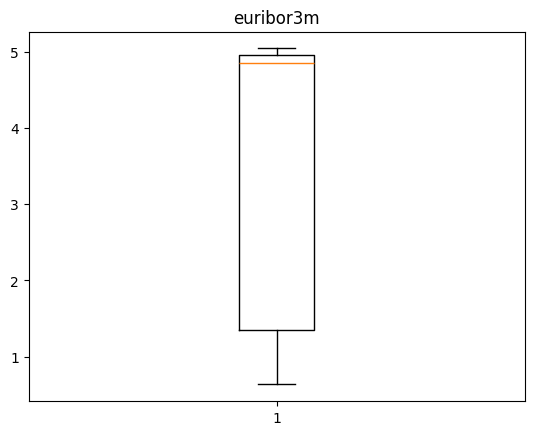

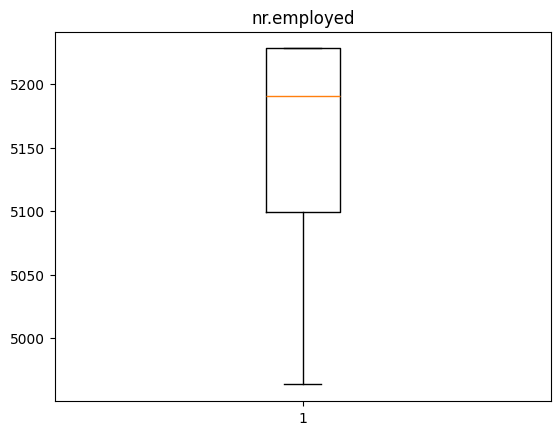

In [28]:
# Outlier Analyis
for col in df.columns:
  if df[col].dtype!="object":
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [29]:
#Enconding
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [32]:
#Fit and fit-transform have different definition and diff task in different classes
df["job"]=le.fit_transform(df["job"])


In [33]:
df["job"].unique()

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8])

In [34]:
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])
        print("for column",col,le.classes_)
        print("for column",col,df[col].unique())


for column marital ['divorced' 'married' 'single' 'unknown']
for column marital [1 2 0 3]
for column education ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
for column education [0 3 1 2 5 7 6 4]
for column default ['no' 'unknown' 'yes']
for column default [0 1 2]
for column housing ['no' 'unknown' 'yes']
for column housing [0 2 1]
for column loan ['no' 'unknown' 'yes']
for column loan [0 2 1]
for column contact ['cellular' 'telephone']
for column contact [1 0]
for column month ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
for column month [6 4 3 1 8 7 2 5 0 9]
for column day_of_week ['fri' 'mon' 'thu' 'tue' 'wed']
for column day_of_week [1 3 4 2 0]
for column poutcome ['failure' 'nonexistent' 'success']
for column poutcome [1 0 2]
for column y ['no' 'yes']
for column y [0 1]


In [35]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35165 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35165 non-null  float64
 1   job             35165 non-null  int64  
 2   marital         35165 non-null  int64  
 3   education       35165 non-null  int64  
 4   default         35165 non-null  int64  
 5   housing         35165 non-null  int64  
 6   loan            35165 non-null  int64  
 7   contact         35165 non-null  int64  
 8   month           35165 non-null  int64  
 9   day_of_week     35165 non-null  int64  
 10  duration        35165 non-null  float64
 11  campaign        35165 non-null  float64
 12  pdays           35165 non-null  float64
 13  previous        35165 non-null  float64
 14  poutcome        35165 non-null  int64  
 15  emp.var.rate    35165 non-null  float64
 16  cons.price.idx  35165 non-null  float64
 17  cons.conf.idx   35165 non-null  floa

In [ ]:
# Visual Analysis - Homework

# **Feature Selection**

In [37]:
# Correlation -
df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.016762,-0.391334,-0.100854,0.191739,-0.005664,-0.005349,0.034921,-0.033203,-0.026799,...,0.012643,0.004257,-0.023142,0.018999,0.076681,0.041054,0.102274,0.088340,0.074006,-0.018263
job,-0.016762,1.000000,0.031943,0.142220,-0.031415,0.007615,-0.012510,-0.021930,-0.036545,0.000419,...,-0.009055,-0.026189,0.019105,0.010587,-0.000470,-0.008488,0.046472,-0.001156,-0.012086,0.023598
marital,-0.391334,0.031943,1.000000,0.106358,-0.083082,0.013370,0.005186,-0.064230,-0.012568,0.006159,...,-0.010908,-0.048035,0.048145,0.004515,-0.099130,-0.063965,-0.033756,-0.107473,-0.105750,0.064662
education,-0.100854,0.142220,0.106358,1.000000,-0.193624,0.013672,0.003972,-0.111465,-0.088087,-0.020234,...,-0.001028,-0.055519,0.043654,0.020334,-0.057126,-0.088639,0.085989,-0.049623,-0.057861,0.084367
default,0.191739,-0.031415,-0.083082,-0.193624,1.000000,-0.013665,0.000383,0.130619,-0.012913,-0.006132,...,0.023958,0.082030,-0.102442,0.022574,0.200101,0.161069,0.045235,0.191706,0.187036,-0.112272
housing,-0.005664,0.007615,0.013370,0.013672,-0.013665,1.000000,0.043047,-0.083344,-0.020588,0.001342,...,-0.009600,-0.007528,0.021192,-0.013932,-0.059711,-0.079804,-0.036152,-0.058325,-0.044891,0.014969
loan,-0.005349,-0.012510,0.005186,0.003972,0.000383,0.043047,1.000000,-0.006644,-0.002576,-0.010463,...,0.012337,-0.000353,0.000965,-0.003562,0.000100,-0.001680,-0.009488,-0.002251,0.000333,-0.007222
contact,0.034921,-0.021930,-0.064230,-0.111465,0.130619,-0.083344,-0.006644,1.000000,0.292769,-0.007871,...,0.043546,0.115705,-0.214777,0.126459,0.399120,0.604001,0.294017,0.402306,0.264713,-0.145123
month,-0.033203,-0.036545,-0.012568,-0.088087,-0.012913,-0.020588,-0.002576,0.292769,1.000000,0.036260,...,-0.033956,-0.032965,0.092854,-0.069198,-0.137305,0.034687,-0.046225,-0.080570,-0.182957,-0.022339
day_of_week,-0.026799,0.000419,0.006159,-0.020234,-0.006132,0.001342,-0.010463,-0.007871,0.036260,1.000000,...,-0.052079,-0.010495,-0.002972,0.018543,0.034629,0.006197,0.041691,0.040746,0.030968,0.013190


<Axes: >

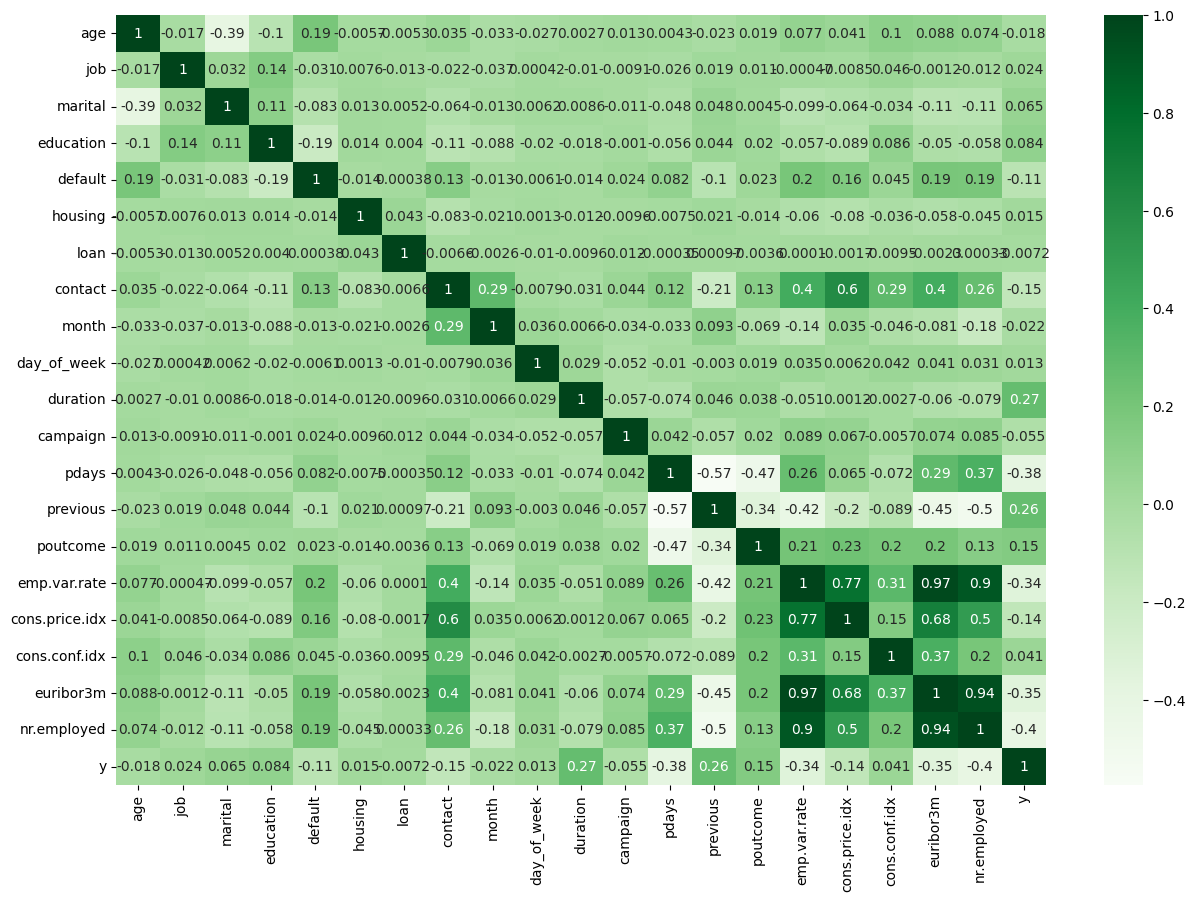

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

In [39]:
#As we can see there were no columns showiing Good Corr()_ with target therefore we are suppose to select other feature selection Technique that is


# VIF  -Variance Inflation Factor

# we have to create a list of columms that have object type and target should not be included as  VIF should be applied to Independent columns

In [40]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

In [41]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [42]:
# Implementation of VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# variance_inflation_factor(df.values,0)


In [44]:
X=df[col_list]
vif_data=pd.DataFrame()  # creating a structure to compare the muticolinearity of each column
vif_data["feature"]=X.columns   # creating a columns that will hold each colums name of X
vif_data["Multicolinearity_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [49]:
vif_data

,feature,Multicolinearity_values
0,age,22.113993
1,job,2.100861
2,marital,5.690071
3,education,4.560285
4,default,1.411946
5,housing,2.212409
6,loan,1.208306
7,contact,2.942422
8,month,6.685085
9,day_of_week,3.099808


In [50]:
X.drop(["nr.employed"],axis=1,inplace=True)

<ipython-input-50-6b81de30c903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["nr.employed"],axis=1,inplace=True)


In [51]:
vif_data=pd.DataFrame()  # creating a structure to compare the muticolinearity of each column
vif_data["feature"]=X.columns   # creating a columns that will hold each colums name of X
vif_data["Multicolinearity_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [52]:
vif_data

,feature,Multicolinearity_values
0,age,22.107715
1,job,2.100612
2,marital,5.689362
3,education,4.558657
4,default,1.409350
5,housing,2.212084
6,loan,1.208260
7,contact,2.446094
8,month,5.784547
9,day_of_week,3.098930


In [53]:
X.drop(["cons.price.idx"],axis=1,inplace=True)

<ipython-input-53-aab8f3ce8aff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["cons.price.idx"],axis=1,inplace=True)


In [54]:
vif_data=pd.DataFrame()  # creating a structure to compare the muticolinearity of each column
vif_data["feature"]=X.columns   # creating a columns that will hold each colums name of X
vif_data["Multicolinearity_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,Multicolinearity_values
0,age,20.980560
1,job,2.095040
2,marital,5.544426
3,education,4.503309
4,default,1.409322
5,housing,2.210417
6,loan,1.207694
7,contact,2.348235
8,month,5.726141
9,day_of_week,3.084650


In [55]:
X.drop(["pdays"],axis=1,inplace=True)


<ipython-input-55-01ef6b1d1acd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["pdays"],axis=1,inplace=True)


In [56]:
vif_data=pd.DataFrame()  # creating a structure to compare the muticolinearity of each column
vif_data["feature"]=X.columns   # creating a columns that will hold each colums name of X
vif_data["Multicolinearity_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,Multicolinearity_values
0,age,20.156176
1,job,2.091851
2,marital,5.426164
3,education,4.449798
4,default,1.409226
5,housing,2.206690
6,loan,1.207556
7,contact,2.274814
8,month,5.664673
9,day_of_week,3.072542


In [57]:
X.drop(["euribor3m"],axis=1,inplace=True)


<ipython-input-57-f03fed7ca00d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["euribor3m"],axis=1,inplace=True)


In [58]:
vif_data=pd.DataFrame()  # creating a structure to compare the muticolinearity of each column
vif_data["feature"]=X.columns   # creating a columns that will hold each colums name of X
vif_data["Multicolinearity_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,Multicolinearity_values
0,age,17.204219
1,job,2.085747
2,marital,5.226350
3,education,4.292137
4,default,1.408832
5,housing,2.198757
6,loan,1.207316
7,contact,2.266725
8,month,5.270616
9,day_of_week,3.032416


In [59]:
X.drop(["cons.conf.idx"],axis=1,inplace=True)


<ipython-input-59-357862269421>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["cons.conf.idx"],axis=1,inplace=True)


In [60]:
vif_data=pd.DataFrame()  # creating a structure to compare the muticolinearity of each column
vif_data["feature"]=X.columns   # creating a columns that will hold each colums name of X
vif_data["Multicolinearity_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,Multicolinearity_values
0,age,11.058997
1,job,2.076503
2,marital,4.372058
3,education,4.193335
4,default,1.407850
5,housing,2.162435
6,loan,1.204070
7,contact,2.242675
8,month,4.871672
9,day_of_week,2.969072


In [61]:
X.drop(["age"],axis=1,inplace=True)


<ipython-input-61-7f4db9896bc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["age"],axis=1,inplace=True)


In [62]:
vif_data=pd.DataFrame()  # creating a structure to compare the muticolinearity of each column
vif_data["feature"]=X.columns   # creating a columns that will hold each colums name of X
vif_data["Multicolinearity_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,Multicolinearity_values
0,job,2.053348
1,marital,4.351772
2,education,4.013198
3,default,1.323133
4,housing,2.112544
5,loan,1.200876
6,contact,2.241469
7,month,4.605944
8,day_of_week,2.888478
9,duration,2.988925


In [63]:
X.drop(["poutcome"],axis=1,inplace=True)


<ipython-input-63-1e80a07b0dc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["poutcome"],axis=1,inplace=True)


In [64]:
vif_data=pd.DataFrame()  # creating a structure to compare the muticolinearity of each column
vif_data["feature"]=X.columns   # creating a columns that will hold each colums name of X
vif_data["Multicolinearity_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,Multicolinearity_values
0,job,2.034164
1,marital,4.135585
2,education,3.788774
3,default,1.313522
4,housing,2.080645
5,loan,1.198855
6,contact,2.225619
7,month,4.490123
8,day_of_week,2.803667
9,duration,2.834777


In [65]:
X   #independent column for model building part

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1
41182,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1
41184,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1
41185,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1


In [66]:
y=df["y"] #dependent
y


,y
0,0
1,0
2,0
3,0
4,0
...,...
41181,1
41182,0
41184,0
41185,0


# **Model Building **

In [67]:
#split the data into training and Test
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=50)

In [69]:
x_train

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
31143,9,1,5,0,2,0,0,6,4,54.0,2.0,1.0,-1.8
40410,0,2,6,0,0,0,0,1,2,215.0,1.0,0.0,-1.7
19652,1,1,0,1,2,0,0,1,2,446.0,1.0,0.0,1.4
2793,1,1,2,0,0,0,1,6,4,188.0,1.0,0.0,1.1
17463,0,0,6,0,0,0,0,3,1,101.0,3.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9734,1,1,0,1,2,0,1,4,1,184.0,5.0,0.0,1.4
40867,9,1,5,0,0,0,0,8,4,486.0,1.0,0.0,-1.1
36972,10,1,2,0,0,0,0,3,2,153.0,1.0,0.0,-2.9
26385,10,2,3,0,2,0,0,7,2,73.0,4.0,0.0,-0.1


In [70]:
y_train

,y
31143,0
40410,1
19652,0
2793,0
17463,0
...,...
9734,0
40867,1
36972,0
26385,0


In [71]:
x_test

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
31756,0,1,6,0,2,0,0,6,2,242.0,3.0,1.0,-1.8
26852,1,1,2,0,2,0,0,7,2,221.0,3.0,0.0,-0.1
29850,1,1,5,0,2,0,0,0,1,93.0,4.0,0.0,-1.8
26234,7,2,1,0,0,0,0,7,2,107.0,1.0,0.0,-0.1
35639,0,1,3,0,2,0,0,6,1,169.0,1.0,0.0,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18666,0,1,6,0,0,0,0,3,2,9.0,5.0,0.0,1.4
10309,9,1,6,0,1,1,1,4,1,71.0,1.0,0.0,1.4
26655,1,1,2,0,0,0,0,7,2,277.0,1.0,0.0,-0.1
37495,8,2,1,0,2,0,0,1,2,293.0,2.0,2.0,-2.9


In [72]:
y_test

,y
31756,0
26852,0
29850,0
26234,0
35639,0
...,...
18666,0
10309,0
26655,0
37495,1


In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
model=LogisticRegression()   # declaration of model

In [75]:
#trainig a model
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
#testing the model
y_pred=model.predict(x_test)

In [77]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [78]:
# y_pred should match with y_test
y_test

,y
31756,0
26852,0
29850,0
26234,0
35639,0
...,...
18666,0
10309,0
26655,0
37495,1


In [79]:
# Evaluation of model's Performance
from sklearn.metrics import *

In [80]:
print("The accuracy of model is ",accuracy_score(y_test,y_pred)*100,"%")

The accuracy of model is  92.32227488151659 %


In [81]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[9556,  161],
       [ 649,  184]])

<Axes: >

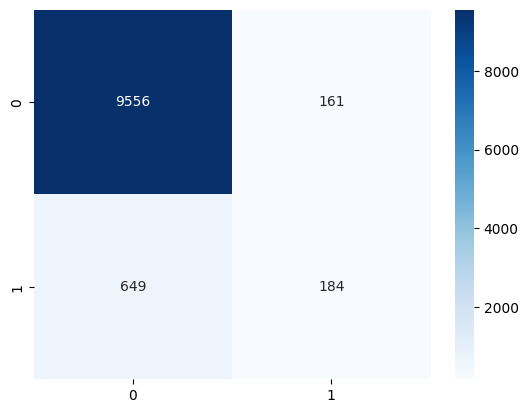

In [82]:
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9717
           1       0.53      0.22      0.31       833

    accuracy                           0.92     10550
   macro avg       0.73      0.60      0.64     10550
weighted avg       0.90      0.92      0.91     10550



 - Overall Accuracy: 92%
- Looks high but misleading due to class imbalance (9717 vs 833).

- The model is biased toward class 0 and fails to correctly identify class 1.